In [3]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import ensemble
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('train.csv')

In [5]:
target = 'NU_NOTA_MT'

In [6]:
features = ['SG_UF_RESIDENCIA',
            'NU_IDADE', 
            'TP_SEXO', 
            'TP_COR_RACA', 
            'TP_NACIONALIDADE',  
            'TP_ST_CONCLUSAO', 
            'TP_ANO_CONCLUIU', 
            'TP_ESCOLA', 
            'TP_ENSINO', 
            'IN_TREINEIRO', 
            'TP_DEPENDENCIA_ADM_ESC',
            'IN_BAIXA_VISAO',
            'IN_CEGUEIRA',
            'IN_SURDEZ',
            'IN_DISLEXIA',
            'IN_DISCALCULIA',
            'IN_SABATISTA',
            'IN_GESTANTE',
            'IN_IDOSO',
            'TP_PRESENCA_CN',
            'TP_PRESENCA_CH',
            'TP_PRESENCA_LC',
            'CO_PROVA_CN',
            'CO_PROVA_CH',
            'CO_PROVA_LC',
            'CO_PROVA_MT',
            'NU_NOTA_CN',
            'NU_NOTA_CH',
            'NU_NOTA_LC',
            'TP_LINGUA',
            'TP_STATUS_REDACAO',
            'NU_NOTA_COMP1',
            'NU_NOTA_COMP2',
            'NU_NOTA_COMP3',
            'NU_NOTA_COMP4',
            'NU_NOTA_COMP5',
            'NU_NOTA_REDACAO'
           ]

In [7]:
#Elimina as linhas com NaN em NU_NOTA_MT
df.dropna(subset=[target], inplace=True)

In [8]:
#Preenche todos os NaN das colunas numericas com a media da coluna
numerical_col = ['NU_NOTA_CN', 'NU_NOTA_CH',
        'NU_NOTA_LC', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
        'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO']
for col in numerical_col:
    df[col].fillna(df[col].mean(), inplace=True)

In [9]:
cd_cat = [ 'TP', 'CO', 'SG']
#Todas as features categóricas
cat_features = [ i for i in features if i[:2] in cd_cat]
#Todas as features numéricas
num_features = list( set( features ) - set( cat_features ) )

In [10]:
#Preenche todos os NaN das colunas categoricas com -1
df[cat_features] = df[cat_features].fillna(-1).astype(str)
df = df.reset_index(drop=True)

In [11]:
#Trata as colunas que contem dados categoricos para que possam ser utilizadas no modelo
onehot = preprocessing.OneHotEncoder( sparse=False, handle_unknown='ignore' ) 
onehot.fit( df[cat_features] )

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [12]:
df_onehot = pd.DataFrame(onehot.transform(df[cat_features]),
                         columns = onehot.get_feature_names(cat_features))

In [13]:
df_onehot.head()

,SG_UF_RESIDENCIA_AC,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,...,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_5.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_train = pd.concat([df[num_features], df_onehot], axis=1, ignore_index=True)

In [15]:
df_train.shape

(10133, 141)

In [16]:
lm = LinearRegression()
lm.fit(df_train, df[target])
print('Estimated intercept coefficient:', lm.intercept_)
print('Number of coefficients:', len(lm.coef_))

Estimated intercept coefficient: -1718234063.7130098
Number of coefficients: 141


In [17]:
features = df_train.columns.tolist()

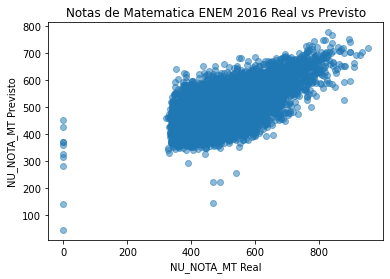

In [18]:
plt.scatter(df[target], lm.predict(df_train), alpha=0.5)
plt.xlabel("NU_NOTA_MT Real")
plt.ylabel("NU_NOTA_MT Previsto")
plt.title("Notas de Matematica ENEM 2016 Real vs Previsto");

In [19]:
np.mean((df[target] - lm.predict(df_train)) ** 2)

5583.503235804488

In [20]:
model = pd.Series( [num_features, cat_features, features, lm, onehot],
                 index=['num_features', 'cat_features', 'features', 'model', 'onehot'])
model.to_pickle('model.pkl')